In [1]:
!pip install -q git+ssh://git@github.com/Nganga-AI/tumkwe-invest.git


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -q pickleshare jupyter pygraphviz


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
%cd ..

/data/home/eak/learning/nganga_ai/agent-flow/langgraph-agentflow


In [4]:
from langchain_ollama import ChatOllama  # type: ignore
from tumkwe_invest.news import TOOL_DESCRIPTION as NEWS_TOOL_DESCRIPTION
from tumkwe_invest.news import tools as news_tools
from tumkwe_invest.sector import TOOL_DESCRIPTION as SECTOR_TOOL_DESCRIPTION
from tumkwe_invest.sector import tools as sector_tools
from tumkwe_invest.ticker import TOOL_DESCRIPTION as TICKER_TOOL_DESCRIPTION
from tumkwe_invest.ticker import tools as ticker_tools
from langgraph_agentflow.multi_step import (
    create_multi_step_agent,
    stream_multi_step_agent,
)
from langgraph_agentflow import visualize_graph

In [5]:
# Initialize LLM
llm = ChatOllama(model="llama3.3", temperature=0.7)

In [6]:
# Create the multi-step agent
graph = create_multi_step_agent(
    llm=llm,
    agent_tools=[
        {
            "name": "news",
            "tools": news_tools,
            "description": NEWS_TOOL_DESCRIPTION,
        },
        {
            "name": "sector",
            "tools": sector_tools,
            "description": SECTOR_TOOL_DESCRIPTION,
        },
        {
            "name": "ticker",
            "tools": ticker_tools,
            "description": TICKER_TOOL_DESCRIPTION,
        },
        {
            "name": "general",
            "description": "Handles general information and queries not specific to other domains",
        },
    ],
)
config = {"configurable": {"thread_id": "user-thread-1"}}

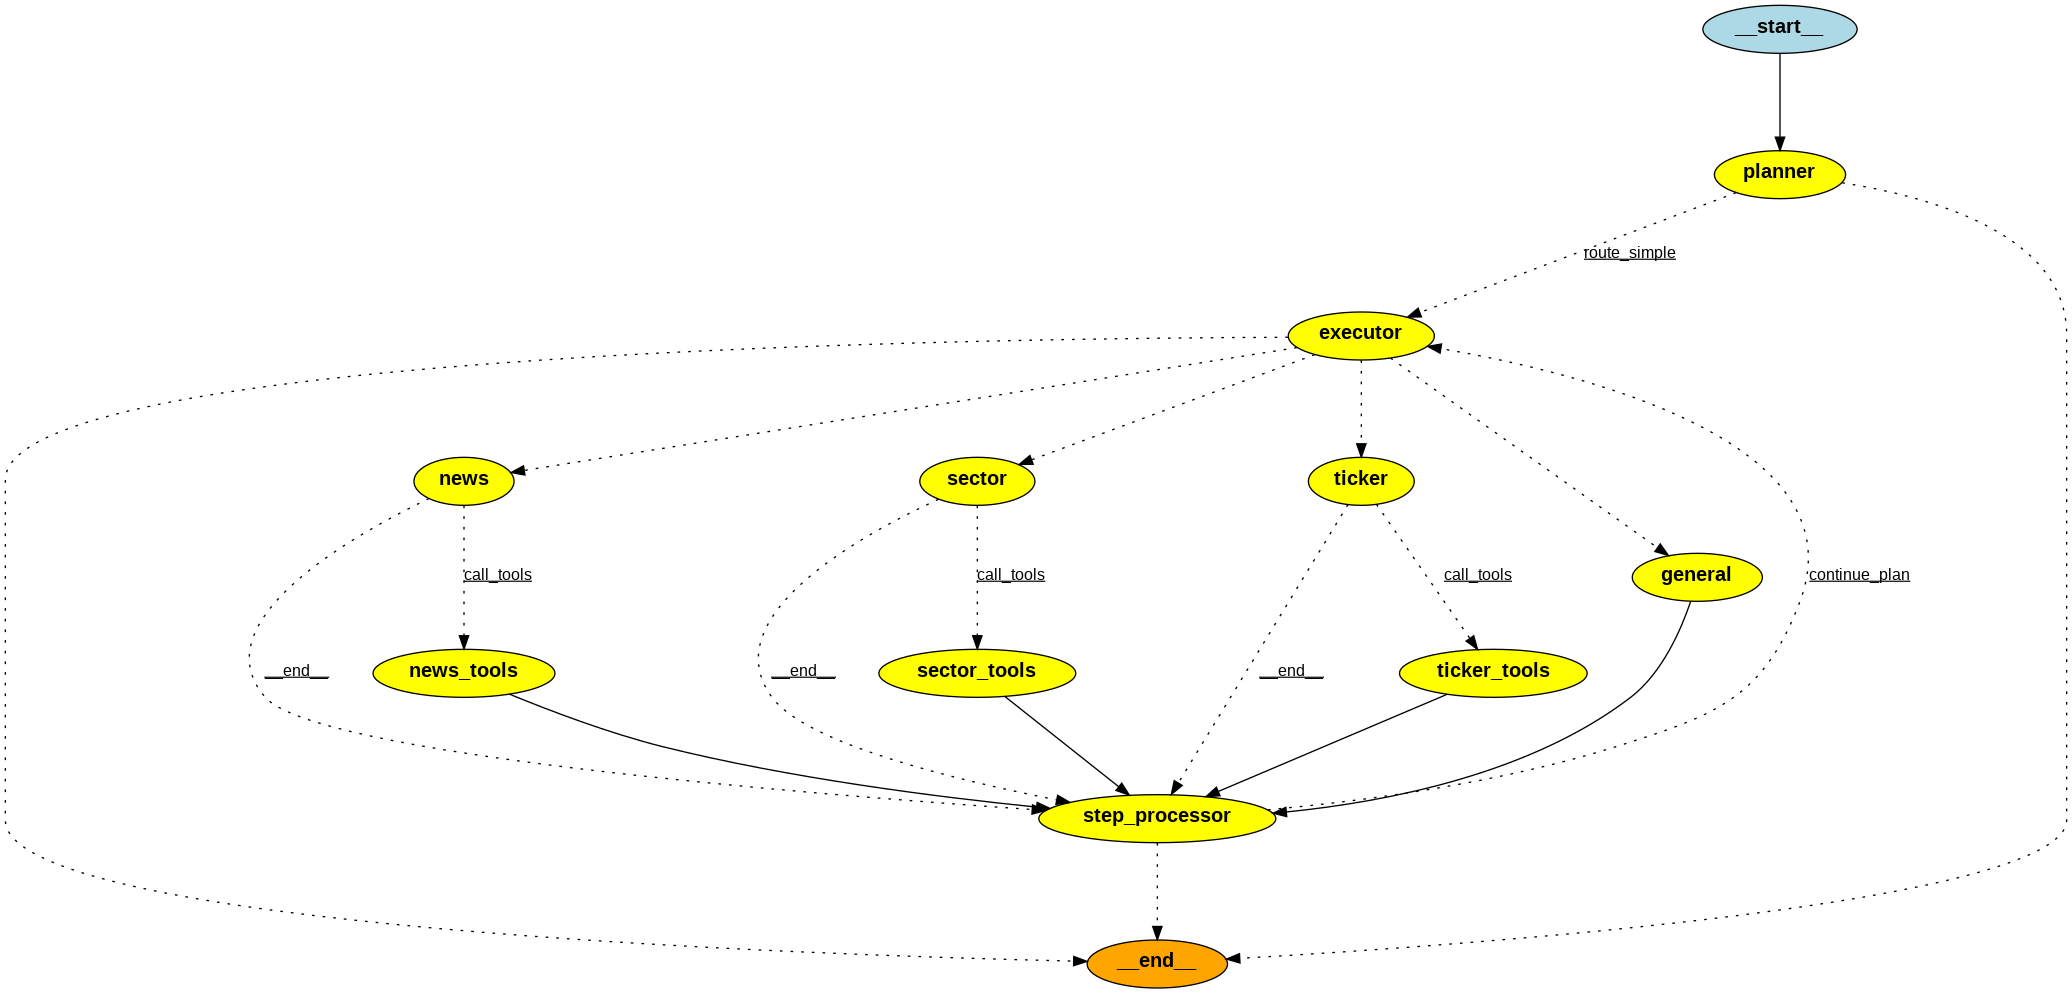

In [7]:
visualize_graph(graph)

In [8]:
flag = True
while flag:
	try:
		user_input = input("Enter your query (or 'exit' to quit): ")
		if user_input.lower() in ["exit", "quit", "q"]:
			flag = False
			break

		# Stream the agent's response
		for step in stream_multi_step_agent(graph, user_input, config):
			message = step["messages"][-1]
			message.pretty_print()
	except Exception as e:
		print(f"An error occurred: {e}")

2025-04-03 09:37:58.790 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:25 - --- Calling Planner Agent ---


================================ Human Message =================================

What's the recent performance of Apple stock and how does it relate to tech sector news?


2025-04-03 09:38:21.004 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:39 - Planner Output:
PLAN:
1. Retrieve the recent performance data of Apple stock using the 'ticker' agent.
2. Fetch the latest news related to the tech sector using the 'news' agent.
3. Analyze the relationship between Apple's stock performance and the broader tech sector news, potentially involving insights from the 'sector' agent about the tech industry's current state.
2025-04-03 09:38:21.010 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:38:21.012 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 1: 1. Retrieve the recent performance data of Apple stock using the 'ticker' agent.


================================ Human Message =================================

What's the recent performance of Apple stock and how does it relate to tech sector news?


2025-04-03 09:38:21.593 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: ticker for step '1. Retrieve the recent performance data of Apple stock using the 'ticker' agent.'
2025-04-03 09:38:21.598 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Ticker Agent ---


================================ Human Message =================================

Focus on this task: 1. Retrieve the recent performance data of Apple stock using the 'ticker' agent.


2025-04-03 09:38:25.620 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: get_stock_price_history ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_price_history (56b67217-c072-46b8-80b9-8a4a60c81857)
 Call ID: 56b67217-c072-46b8-80b9-8a4a60c81857
  Args:
    interval: 1d
    period: 1y
    ticker: AAPL


2025-04-03 09:38:25.875 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:38:25.879 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 1. Moving to step 2.
2025-04-03 09:38:25.883 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:38:25.886 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 2: 2. Fetch the latest news related to the tech sector using the 'news' agent.


================================= Tool Message =================================
Name: get_stock_price_history

{'Open': {Timestamp('2024-04-03 00:00:00-0400', tz='America/New_York'): 167.99673277562965, Timestamp('2024-04-04 00:00:00-0400', tz='America/New_York'): 169.48968886138192, Timestamp('2024-04-05 00:00:00-0400', tz='America/New_York'): 168.79298281447828, Timestamp('2024-04-08 00:00:00-0400', tz='America/New_York'): 168.23561647794648, Timestamp('2024-04-09 00:00:00-0400', tz='America/New_York'): 167.90717701117094, Timestamp('2024-04-10 00:00:00-0400', tz='America/New_York'): 168.0066961691415, Timestamp('2024-04-11 00:00:00-0400', tz='America/New_York'): 167.54885233902874, Timestamp('2024-04-12 00:00:00-0400', tz='America/New_York'): 173.44102962389059, Timestamp('2024-04-15 00:00:00-0400', tz='America/New_York'): 174.53586805138283, Timestamp('2024-04-16 00:00:00-0400', tz='America/New_York'): 170.94285690412892, Timestamp('2024-04-17 00:00:00-0400', tz='America/New_York'

2025-04-03 09:38:26.435 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: news for step '2. Fetch the latest news related to the tech sector using the 'news' agent.'
2025-04-03 09:38:26.441 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling News Agent ---


================================ Human Message =================================

Focus on this task: 2. Fetch the latest news related to the tech sector using the 'news' agent.


2025-04-03 09:38:28.810 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: fetch_company_news ---


================================== Ai Message ==================================
Tool Calls:
  fetch_company_news (a5aaed87-c8c2-4f9c-a904-48e3c2d0d85f)
 Call ID: a5aaed87-c8c2-4f9c-a904-48e3c2d0d85f
  Args:
    max_articles: 10
    ticker: tech sector


2025-04-03 09:38:29.923 | WARNING  | tumkwe_invest.news:fetch_company_news:35 - No results found for tech sector.
2025-04-03 09:38:30.118 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:38:30.121 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 2. Moving to step 3.
2025-04-03 09:38:30.125 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:38:30.128 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 3: 3. Analyze the relationship between Apple's stock performance and the broader tech sector news, potentially involving insights from the 'sector' agent about the tech industry's current state.


================================= Tool Message =================================
Name: fetch_company_news

[{"title": "Exploring Three High Growth Tech Stocks in Asia", "source": "Simply Wall St.", "providerPublishTime": "2025-04-02 22:05:40"}, {"title": "Microsoft has adapted to change for 50 years. What's next?", "source": "Quartz", "providerPublishTime": "2025-04-03 09:00:00"}, {"title": "3 Reasons the Vanguard S&P 500 Growth ETF Is a Long-Term Buy for 2030 and Beyond", "source": "Motley Fool", "providerPublishTime": "2025-04-03 08:00:00"}, {"title": "High Growth Tech Stocks in the UK Featuring GB Group and Two Others", "source": "Simply Wall St.", "providerPublishTime": "2025-04-03 06:08:14"}, {"title": "Exploring Kingdee International Software Group And 2 More High Growth Tech Stocks In Asia", "source": "Simply Wall St.", "providerPublishTime": "2025-04-03 04:08:04"}, {"title": "Is Sabre Corp. (SABR) the Best Technology Penny Stock to Buy Right Now?", "source": "Insider Monkey", "

2025-04-03 09:38:30.732 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: ticker for step '3. Analyze the relationship between Apple's stock performance and the broader tech sector news, potentially involving insights from the 'sector' agent about the tech industry's current state.'
2025-04-03 09:38:30.737 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Ticker Agent ---


================================ Human Message =================================

Focus on this task: 3. Analyze the relationship between Apple's stock performance and the broader tech sector news, potentially involving insights from the 'sector' agent about the tech industry's current state.


2025-04-03 09:38:34.857 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: get_stock_info ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_info (e619b080-9599-4663-93c5-41e48f6ce8ea)
 Call ID: e619b080-9599-4663-93c5-41e48f6ce8ea
  Args:
    ticker: AAPL


2025-04-03 09:38:35.247 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:38:35.252 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:144 - Plan finished. Synthesizing final answer.


================================= Tool Message =================================
Name: get_stock_info

{"address1": "One Apple Park Way", "city": "Cupertino", "state": "CA", "zip": "95014", "country": "United States", "phone": "(408) 996-1010", "website": "https://www.apple.com", "industry": "Consumer Electronics", "industryKey": "consumer-electronics", "industryDisp": "Consumer Electronics", "sector": "Technology", "sectorKey": "technology", "sectorDisp": "Technology", "longBusinessSummary": "Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discove

2025-04-03 09:39:14.129 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:152 - --- Final Synthesized Response ---


================================== Ai Message ==================================

Based on the provided data, I will synthesize a comprehensive final answer.

The original query appears to be related to retrieving financial data for Apple Inc. (AAPL). The data provided includes various financial metrics, analyst recommendations, and market information.

Here is a summary of the key findings:

1. **Financial Metrics:**
	* Current price: $223.89
	* Market capitalization: Not explicitly stated, but can be calculated using the total revenue and other financial metrics.
	* Total cash: $53.75 billion
	* Total debt: $96.79 billion
	* Revenue per share: $25.97
	* Earnings per share (EPS) trailing twelve months: $6.29
	* EPS forward: $8.31
2. **Analyst Recommendations:**
	* Average analyst rating: 2.0 - Buy
	* Target high price: $325.00
	* Target low price: $197.00
	* Target mean price: $252.72
	* Recommendation key: Buy
3. **Market Information:**
	* Exchange: Nasdaq (NMS)
	* Full exchange name

2025-04-03 09:40:28.838 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:25 - --- Calling Planner Agent ---


================================ Human Message =================================

What are top companies performer in the sector of industrials with their stocks


2025-04-03 09:40:34.667 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:39 - Planner Output:
PLAN:
1. Identify the industrials sector and its top companies using the 'sector' agent.
2. Retrieve the current stock information for these top companies in the industrials sector using the 'ticker' agent.
3. Optionally, fetch news articles about these top-performing companies in the industrials sector for additional context using the 'news' agent.
2025-04-03 09:40:34.672 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:40:34.675 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 1: 1. Identify the industrials sector and its top companies using the 'sector' agent.


================================ Human Message =================================

What are top companies performer in the sector of industrials with their stocks


2025-04-03 09:40:35.246 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: sector for step '1. Identify the industrials sector and its top companies using the 'sector' agent.'
2025-04-03 09:40:35.252 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Sector Agent ---


================================ Human Message =================================

Focus on this task: 1. Identify the industrials sector and its top companies using the 'sector' agent.


2025-04-03 09:40:40.782 | WARNING  | langgraph_agentflow.multi_step.graph:route_tools:38 - --- No Tool Call Detected by Agent ---
2025-04-03 09:40:40.786 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:40:40.789 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 1. Moving to step 2.
2025-04-03 09:40:40.794 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:40:40.796 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 2: 2. Retrieve the current stock information for these top companies in the industrials sector using the 'ticker' agent.


================================== Ai Message ==================================

Your input is lacking necessary details. Please provide more information or specify the task you need help with.
================================== Ai Message ==================================

Your input is lacking necessary details. Please provide more information or specify the task you need help with.


2025-04-03 09:40:41.347 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: ticker for step '2. Retrieve the current stock information for these top companies in the industrials sector using the 'ticker' agent.'
2025-04-03 09:40:41.350 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Ticker Agent ---


================================ Human Message =================================

Focus on this task: 2. Retrieve the current stock information for these top companies in the industrials sector using the 'ticker' agent.


2025-04-03 09:40:55.954 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: get_stock_info ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_info (e320bf4b-cf07-4fda-bff0-5611fd8f0486)
 Call ID: e320bf4b-cf07-4fda-bff0-5611fd8f0486
  Args:
    ticker: CAT
  get_stock_info (e5c98cd0-9a6e-4dff-bc64-9bb51f779575)
 Call ID: e5c98cd0-9a6e-4dff-bc64-9bb51f779575
  Args:
    ticker: DE
  get_stock_info (1239515d-1365-4ae7-b222-2b88e62f6778)
 Call ID: 1239515d-1365-4ae7-b222-2b88e62f6778
  Args:
    ticker: BA
  get_stock_info (26921718-6c35-474c-8244-4d99d7ddeb3d)
 Call ID: 26921718-6c35-474c-8244-4d99d7ddeb3d
  Args:
    ticker: LMT
  get_stock_info (ae9844d9-6fa6-4470-a275-335d0c0090a2)
 Call ID: ae9844d9-6fa6-4470-a275-335d0c0090a2
  Args:
    ticker: RTX
  get_stock_info (9802bada-46ae-4001-8346-9fcdbe895754)
 Call ID: 9802bada-46ae-4001-8346-9fcdbe895754
  Args:
    ticker: GD
  get_stock_info (6b6faeac-ad67-435b-972b-9ed1f39f7596)
 Call ID: 6b6faeac-ad67-435b-972b-9ed1f39f7596
  Args:
    ticker: NOC
  get_stock_info (8e5

2025-04-03 09:40:57.271 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:40:57.273 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 2. Moving to step 3.
2025-04-03 09:40:57.278 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:40:57.282 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 3: 3. Optionally, fetch news articles about these top-performing companies in the industrials sector for additional context using the 'news' agent.


================================= Tool Message =================================
Name: get_stock_info

{"address1": "500 Jackson Street", "address2": "Box 3005", "city": "Columbus", "state": "IN", "zip": "47202-3005", "country": "United States", "phone": "812 377 5000", "website": "https://www.cummins.com", "industry": "Specialty Industrial Machinery", "industryKey": "specialty-industrial-machinery", "industryDisp": "Specialty Industrial Machinery", "sector": "Industrials", "sectorKey": "industrials", "sectorDisp": "Industrials", "longBusinessSummary": "Cummins Inc. offers various power solutions worldwide. It operates through five segments: Engine, Distribution, Components, Power Systems, and Accelera. The company offers diesel and natural gas-powered engines; and drivetrain systems, including axles, drivelines, brakes, and suspension systems; truck, trailer, on- and off-highway, and other products. It also provides aftertreatment technology and solutions comprising custom engineering

2025-04-03 09:40:57.868 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: news for step '3. Optionally, fetch news articles about these top-performing companies in the industrials sector for additional context using the 'news' agent.'
2025-04-03 09:40:57.873 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling News Agent ---


================================ Human Message =================================

Focus on this task: 3. Optionally, fetch news articles about these top-performing companies in the industrials sector for additional context using the 'news' agent.


2025-04-03 09:41:00.680 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: fetch_company_news ---


================================== Ai Message ==================================
Tool Calls:
  fetch_company_news (5b69ad1b-8ff1-4083-afac-42b5de8c50d9)
 Call ID: 5b69ad1b-8ff1-4083-afac-42b5de8c50d9
  Args:
    max_articles: 10
    ticker: industrials sector top-performing companies


2025-04-03 09:41:01.791 | WARNING  | tumkwe_invest.news:fetch_company_news:35 - No results found for industrials sector top-performing companies.
2025-04-03 09:41:02.098 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:41:02.102 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:144 - Plan finished. Synthesizing final answer.


================================= Tool Message =================================
Name: fetch_company_news

[{"title": "Stock Futures Plunge After Tariff Announcement", "source": "Barrons.com", "providerPublishTime": "2025-04-02 23:50:51"}, {"title": "'Worse than expected': Wall Street reacts to Trump's 'Liberation Day' tariff surprise, stocks sink", "source": "Yahoo Finance", "providerPublishTime": "2025-04-02 22:23:45"}, {"title": "How major US stock indexes fared Wednesday, 4/2/2025", "source": "Associated Press Finance", "providerPublishTime": "2025-04-02 20:43:07"}, {"title": "Trump announces sweeping range of reciprocal tariffs, 10% worldwide tariff in 'Liberation Day' proclamation", "source": "Yahoo Finance", "providerPublishTime": "2025-04-02 20:35:05"}, {"title": "Stocks close higher as Trump unveils tariffs plans", "source": "Yahoo Finance Video", "providerPublishTime": "2025-04-02 20:08:41"}, {"title": "Stock market today: Stock futures sink after Trump's 'Liberation Day' tar

2025-04-03 09:41:44.831 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:152 - --- Final Synthesized Response ---


================================== Ai Message ==================================

Based on the provided data, I will synthesize a comprehensive final answer to the original query.

The original query asked for information about top-performing companies in the industrials sector, along with their current stock prices and news articles about these companies for additional context.

From the provided financial data, we can see that Cummins Inc. is one of the top-performing companies in the industrials sector. The company's current stock price is around $321.24, with a 52-week range of $261.51 to $387.9. The company has a market capitalization of approximately $53.45 billion and an average daily trading volume of around 901,213 shares.

The financial data also provides information about the company's earnings per share (EPS), which is currently at $28.38 for the trailing twelve months. The EPS for the current year is estimated to be around $22.23, with a price-to-earnings ratio of approxim

2025-04-03 09:43:00.742 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:25 - --- Calling Planner Agent ---


================================ Human Message =================================

Apple stock income and cashflow and recommendation from experts


2025-04-03 09:43:06.440 | INFO     | langgraph_agentflow.multi_step.agents:plan_request:39 - Planner Output:
PLAN:
1. Retrieve Apple's current stock information using the 'ticker' agent to understand its financial standing.
2. Fetch Apple's historical income and cash flow data using the 'ticker' agent for in-depth financial analysis.
3. Search news archives using the 'news' agent to find expert recommendations and analyses related to Apple's stock performance.
2025-04-03 09:43:06.450 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:43:06.452 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 1: 1. Retrieve Apple's current stock information using the 'ticker' agent to understand its financial standing.


================================ Human Message =================================

Apple stock income and cashflow and recommendation from experts


2025-04-03 09:43:07.022 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: ticker for step '1. Retrieve Apple's current stock information using the 'ticker' agent to understand its financial standing.'
2025-04-03 09:43:07.028 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Ticker Agent ---


================================ Human Message =================================

Focus on this task: 1. Retrieve Apple's current stock information using the 'ticker' agent to understand its financial standing.


2025-04-03 09:43:12.421 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: get_stock_info ---
2025-04-03 09:43:12.625 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:43:12.630 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 1. Moving to step 2.
2025-04-03 09:43:12.634 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_info (9e1303ef-b5b4-40ba-bc88-eb46f210a17b)
 Call ID: 9e1303ef-b5b4-40ba-bc88-eb46f210a17b
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_info

{"address1": "One Apple Park Way", "city": "Cupertino", "state": "CA", "zip": "95014", "country": "United States", "phone": "(408) 996-1010", "website": "https://www.apple.com", "industry": "Consumer Electronics", "industryKey": "consumer-electronics", "industryDisp": "Consumer Electronics", "sector": "Technology", "sectorKey": "technology", "sectorDisp": "Technology", "longBusinessSummary": "Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and acces

2025-04-03 09:43:12.637 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 2: 2. Fetch Apple's historical income and cash flow data using the 'ticker' agent for in-depth financial analysis.
2025-04-03 09:43:13.221 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: ticker for step '2. Fetch Apple's historical income and cash flow data using the 'ticker' agent for in-depth financial analysis.'
2025-04-03 09:43:13.227 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling Ticker Agent ---


================================ Human Message =================================

Focus on this task: 2. Fetch Apple's historical income and cash flow data using the 'ticker' agent for in-depth financial analysis.


2025-04-03 09:43:18.654 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: get_stock_income_statement ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_income_statement (17b0c7a0-22ad-47fa-8bf9-eff3fa88b629)
 Call ID: 17b0c7a0-22ad-47fa-8bf9-eff3fa88b629
  Args:
    freq: yearly
    ticker: AAPL
  get_stock_cash_flow (c212c67e-91a9-45e3-a7b6-30d6008795db)
 Call ID: c212c67e-91a9-45e3-a7b6-30d6008795db
  Args:
    freq: yearly
    ticker: AAPL


2025-04-03 09:43:19.887 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:43:19.892 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:135 - Finished step 2. Moving to step 3.
2025-04-03 09:43:19.896 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:74 - --- Calling Executor Agent ---
2025-04-03 09:43:19.898 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:85 - Executing Step 3: 3. Search news archives using the 'news' agent to find expert recommendations and analyses related to Apple's stock performance.


================================= Tool Message =================================
Name: get_stock_cash_flow

{Timestamp('2024-09-30 00:00:00'): {'Free Cash Flow': 108807000000.0, 'Repurchase Of Capital Stock': -94949000000.0, 'Repayment Of Debt': -9958000000.0, 'Issuance Of Debt': 0.0, 'Issuance Of Capital Stock': nan, 'Capital Expenditure': -9447000000.0, 'Interest Paid Supplemental Data': nan, 'Income Tax Paid Supplemental Data': 26102000000.0, 'End Cash Position': 29943000000.0, 'Beginning Cash Position': 30737000000.0, 'Changes In Cash': -794000000.0, 'Financing Cash Flow': -121983000000.0, 'Cash Flow From Continuing Financing Activities': -121983000000.0, 'Net Other Financing Charges': -5802000000.0, 'Cash Dividends Paid': -15234000000.0, 'Common Stock Dividend Paid': -15234000000.0, 'Net Common Stock Issuance': -94949000000.0, 'Common Stock Payments': -94949000000.0, 'Common Stock Issuance': nan, 'Net Issuance Payments Of Debt': -5998000000.0, 'Net Short Term Debt Issuance': 39600

2025-04-03 09:43:20.498 | INFO     | langgraph_agentflow.multi_step.agents:execute_step:99 - Executor Routing Decision: news for step '3. Search news archives using the 'news' agent to find expert recommendations and analyses related to Apple's stock performance.'
2025-04-03 09:43:20.504 | INFO     | langgraph_agentflow.multi_step.agents:call_agent:209 - --- Calling News Agent ---


================================ Human Message =================================

Focus on this task: 3. Search news archives using the 'news' agent to find expert recommendations and analyses related to Apple's stock performance.


2025-04-03 09:43:22.747 | INFO     | langgraph_agentflow.multi_step.graph:route_tools:34 - --- Routing to Tools: fetch_company_news ---
2025-04-03 09:43:22.863 | WARNING  | tumkwe_invest.news:fetch_company_news:35 - No results found for Apple.


================================== Ai Message ==================================
Tool Calls:
  fetch_company_news (7a16ebf2-3a5b-4842-a70f-d37253fb2616)
 Call ID: 7a16ebf2-3a5b-4842-a70f-d37253fb2616
  Args:
    max_articles: 10
    ticker: Apple


2025-04-03 09:43:23.034 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:121 - --- Processing Step Result ---
2025-04-03 09:43:23.038 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:144 - Plan finished. Synthesizing final answer.


================================= Tool Message =================================
Name: fetch_company_news

[{"title": "Apple Production Hubs Hit by Tariffs, Sending Shares Plummeting", "source": "Bloomberg", "providerPublishTime": "2025-04-02 22:52:42"}, {"title": "These Stocks Are Moving the Most Today: Apple, Nvidia, Tesla, Nike, RH, Dollar Tree, Lucid, and More", "source": "Barrons.com", "providerPublishTime": "2025-04-03 09:34:00"}, {"title": "Watch These Apple Price Levels as Stock Slides After Trump Tariff Announcement", "source": "Investopedia", "providerPublishTime": "2025-04-03 02:55:48"}, {"title": "Apple and Other Tech Stocks Likely to Take a Hit From Tariffs", "source": "Barrons.com", "providerPublishTime": "2025-04-02 16:00:48"}, {"title": "Apple and Dell Face Higher Costs", "source": "Barrons.com", "providerPublishTime": "2025-04-02 22:26:46"}, {"title": "How Apple Gets a Lift From Visa’s $100M Credit Card Offer", "source": "Barrons.com", "providerPublishTime": "2025-04-0

2025-04-03 09:44:16.529 | INFO     | langgraph_agentflow.multi_step.agents:process_step_result:152 - --- Final Synthesized Response ---


================================== Ai Message ==================================

Based on the financial data provided for Apple Inc., we can analyze its performance over the given time period. The data includes various financial metrics such as revenue, net income, cash flow, and stock price.

**Financial Performance:**

1. **Revenue:** Apple's revenue has been steadily increasing over the years, with some fluctuations. In 2022, the company reported a revenue of $394.3 billion, which is a significant increase from $274.5 billion in 2020.
2. **Net Income:** The net income has also shown an upward trend, with $94.7 billion in 2022 compared to $57.4 billion in 2020.
3. **Cash Flow:** The operating cash flow has been consistently high, with $111.4 billion in 2022, indicating the company's ability to generate cash from its operations.
4. **Stock Price:** The stock price has been volatile, with a high of $182.94 in 2022 and a low of $129.04 in 2020.

**News Analysis:**

The news articles pr